<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/blob/main/5_Alternativas_Regresi%C3%B3n_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Para este notebook vamos a comparar las diferentes regresiones lineares. En este caso, usaremos el dataset de propinas otravez ya que tiene mayor heterocedasticidad que el de pingüinos. 

Para este ejercicio solo traermos un par de modulos nuevos. En este caso *Lasso* y *Ridge* de la librería Scikit Learn.

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Antes de entrenar el modelo, eliminaremos los datos nulos. Como hicimos anteriormente, también borraremos datos nulos (ya que no pueden ser procesados por el modelo), crearemos una matriz artificial a partir de x y dividiremos nuestros valores para entrenamiento y testeo.

In [8]:
df.dropna(inplace=True)

In [29]:
X = df["total_bill"].values.reshape(-1,1)
y = df["tip"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Linear vs Ridge vs Lasso

En esta parte solo haremos el entrenamiento de estas tres regresiones.

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ahora, graficaremos las líneas de mejor ajuste para comparar sus comportamientos. 

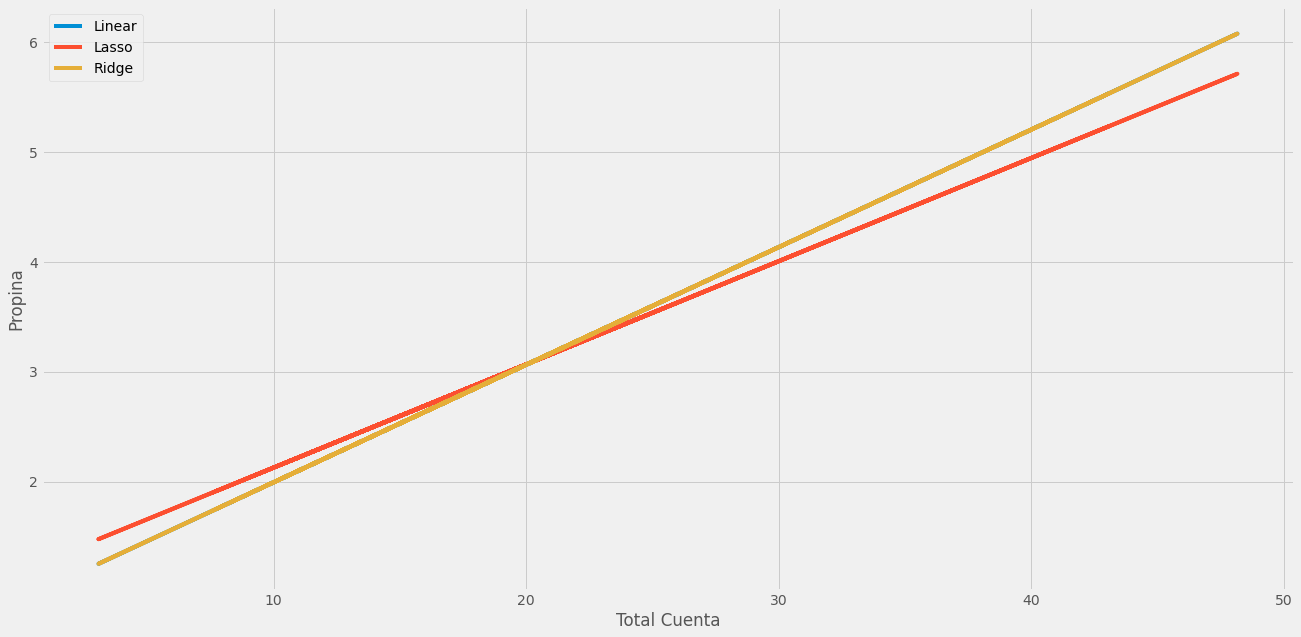

In [34]:
plt.plot(X_test, reg.predict(X_test))
plt.plot(X_test, lasso.predict(X_test))
plt.plot(X_test, ridge.predict(X_test))
plt.legend(["Linear", "Lasso", "Ridge"])
plt.xlabel("Total Cuenta")
plt.ylabel("Propina")

plt.show()

Podemos ver que Ridge y Linear se comportaron básicamente igual, mientras que Lasso difirió un poco. 

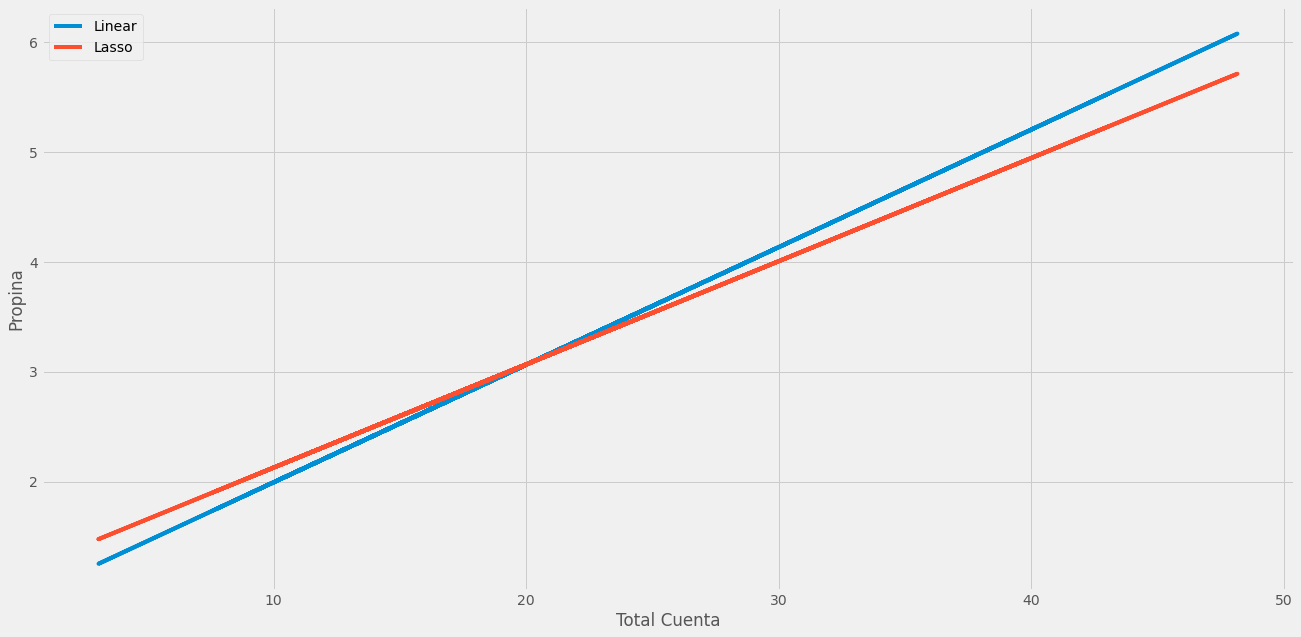

In [35]:
plt.plot(X_test, reg.predict(X_test))
plt.plot(X_test, lasso.predict(X_test))
plt.xlabel("Total Cuenta")
plt.ylabel("Propina")
plt.legend(["Linear", "Lasso"])

plt.show()

# Evaluación de Modelos

Cuando trabajamos con mahcine learning, algo común es entrenar varios modelos y luego medir sus desempeños para decidir cual de ellos usar. 

En este caso solo mediremos el desempeño de la regresión linear y lasso, usando el promedio de errores cuadrados y r² (coeficiente de determinación). 

In [75]:
y_reg_predict = reg.predict(X_test)
y_lasso_predict = lasso.predict(X_test)

In [77]:
rmse = mean_squared_error(y_test, y_reg_predict)
r2 = r2_score(y_test, y_reg_predict)

print(rmse)
print(r2)

0.5688142529229536
0.5449381659234664


In [78]:
rmse = mean_squared_error(y_test, y_lasso_predict)
r2 = r2_score(y_test, y_lasso_predict)

print(rmse)
print(r2)

0.5665976098709371
0.5467115210170849


En general, ambas regresinones tuvieron resultados similares. De hecho, habría varias formas para mejorar nuestro modelo. La más importante sería levantar una mayor cantidad de datos que nos ayude a comprender mejor el fenómeno. 

Finalmente, podemos hacer una evaluación de errores residuales de ambas regresiones.

[Nota: los errores residuales no la resta de los errores verdaderos y los errores predecidos]

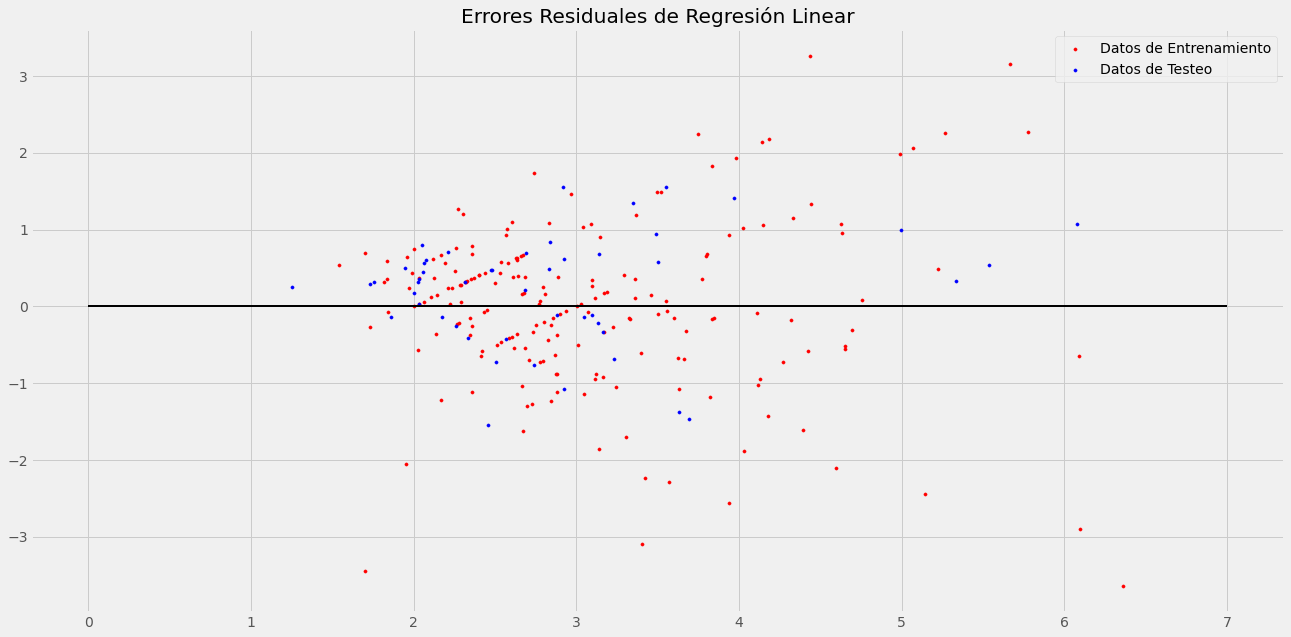

In [19]:
plt.style.use('fivethirtyeight') 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Datos de Entrenamiento')  
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Datos de Testeo')   
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)   
plt.legend(loc = 'upper right') 
plt.title("Errores Residuales de Regresión Linear") 
  
plt.show() 

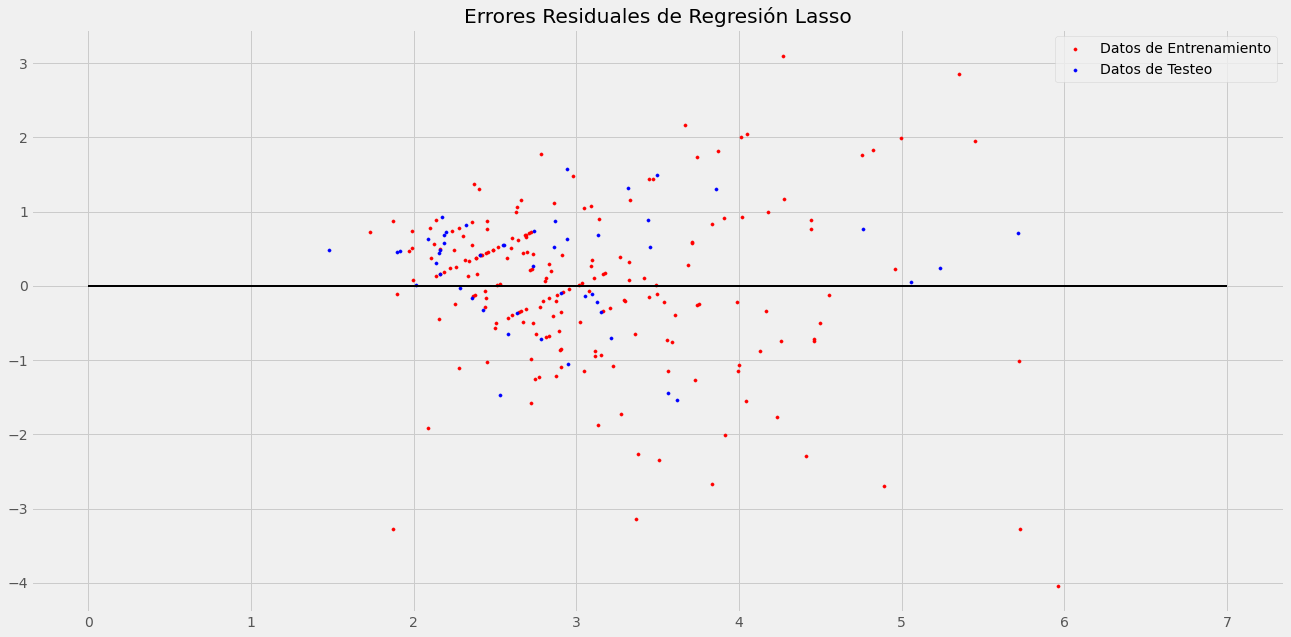

In [20]:
plt.style.use('fivethirtyeight') 
plt.scatter(lasso.predict(X_train), lasso.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Datos de Entrenamiento')  
plt.scatter(lasso.predict(X_test), lasso.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Datos de Testeo')   
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)   
plt.legend(loc = 'upper right') 
plt.title("Errores Residuales de Regresión Lasso") 
  
plt.show() 